In [1]:
# My Datalab instance came with an older version and pre 1.0 releases
# are not necessarily backwards compatible.
# !pip install google-cloud-bigquery==0.30

In [2]:
from google.cloud import bigquery as bq

In [3]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/ntansaraviput/workspace/ml/p2rcc/navi/credentials/.google-cloud.json"

In [4]:
client = bq.Client()
dataset_ref = client.dataset('tcga_201607_beta', project='isb-cgc')

In [5]:
for t in client.list_tables(dataset_ref):
  table_ref = dataset_ref.table(t.table_id)
  table = client.get_table(table_ref)
  print (table.num_rows, table.num_bytes, t.table_id)

6322 1729204 Annotations
23797 6382147 Biospecimen_data
11160 4201379 Clinical_data
2646095 333774244 Copy_Number_segments
3944304319 445303830985 DNA_Methylation_betas
382335670 43164264006 DNA_Methylation_chr1
197519895 22301345198 DNA_Methylation_chr10
235823572 26623975945 DNA_Methylation_chr11
198050739 22359642619 DNA_Methylation_chr12
97301675 10986815862 DNA_Methylation_chr13
123239379 13913712352 DNA_Methylation_chr14
124566185 14064712239 DNA_Methylation_chr15
179772812 20296128173 DNA_Methylation_chr16
234003341 26417830751 DNA_Methylation_chr17
50216619 5669139362 DNA_Methylation_chr18
211386795 23862583107 DNA_Methylation_chr19
279668485 31577200462 DNA_Methylation_chr2
86858120 9805923353 DNA_Methylation_chr20
35410447 3997986812 DNA_Methylation_chr21
70676468 7978947938 DNA_Methylation_chr22
201119616 22705358910 DNA_Methylation_chr3
159148744 17968482285 DNA_Methylation_chr4
195864180 22113162401 DNA_Methylation_chr5
290275524 32772371379 DNA_Methylation_chr6
240010275 

In [6]:
%matplotlib inline

In [7]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
# sns.set_style("whitegrid")

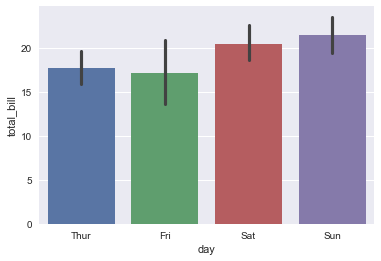

In [8]:
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [20]:
import json
credentials_path = "credentials/.google-cloud.json"

with open(credentials_path) as f:
    credentials = json.load(f)
    project_id = credentials['project_id']

In [22]:
GENE = 'TTN'

This is all about TTN


[[]]

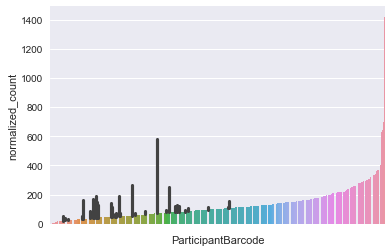

In [42]:
df = pd.read_gbq(f"SELECT ParticipantBarcode, normalized_count FROM `tcga_201607_beta.mRNA_KIRP` WHERE original_gene_symbol='{GENE}' OR HGNC_gene_symbol='{GENE}' ORDER BY normalized_count", project_id, dialect='standard')
ax = sns.barplot(x="ParticipantBarcode", y="normalized_count", data=df)
ax.set(xticklabels=[])


In [23]:
df = pd.read_gbq(f'SELECT ParticipantBarcode, normalized_count FROM `isb-cgc.tcga_201607_beta.Clinical_data` ', project_id, dialect='standard')


GenericGBQException: Reason: 400 Unrecognized name: original_gene_symbol at [1:97]

In [36]:
query = client.query("select * from `isb-cgc.tcga_201607_beta.Clinical_data` limit 5")
results = query.result()
for row in results:
  print(row)

>>> import seaborn as sns
>>> 
>>> 
>>> 

Row(('TCGA-AB-2986', 'LAML', 'TCGA', '233400c5-6a47-40e2-bf2a-8b7fc9df462b', 'AB', 31, None, 25, 'Washington University', None, None, None, None, None, None, 'Dead', -11596, 212, 212, None, 0, None, 'NOT HISPANIC OR LATINO', 'FEMALE', None, None, None, 'No', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 2008, None, None, None, None, None, None, None, None, None, 'WHITE', None, None, 'Bone Marrow', None, None, None, None, None, None, None, None, None, None, None, None, None), {'ParticipantBarcode': 0, 'Study': 1, 'Project': 2, 'ParticipantUUID': 3, 'TSSCode': 4, 'age_at_initial_pathologic_diagnosis': 5, 'anatomic_neoplasm_subdivision': 6, 'batch_number': 7, 'bcr': 8, 'clinical_M': 9, 'clinical_N': 10, 'clinical_T': 11, 'clinical_stage': 12, 'colorectal_cancer': 13, 'country': 14, 'vital_status': 15, 'days_to_birth': 16, 'days_to_death': 17, 'days_to_last_known_alive': 18, 'days_to_last_followup': 19, 'days_to_initial_pathologic_diagnosis': 20,